<a href="https://colab.research.google.com/github/drskprabhakar/AI-ML-DL-colab-notebooks-coding-models/blob/main/DCR_gender_chi_square_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn

In [2]:
df = pd.read_excel('/content/drive/MyDrive/DCR new clean dataset.xlsx')
df.shape

(25, 36)

In [3]:
import openpyxl
df1 = openpyxl.load_workbook('/content/drive/MyDrive/DCR new clean dataset.xlsx')
print(df1.sheetnames)


['DCR dataset', 'Age-Gender', 'IO-L,W,OA', 'Day 1 PostOp-L,W,OA,FDDT (2)', '1 month PostOp-L,W,OA,FDDT (2)', '3 month PostOp-L,W,OA,FDDT']


In [4]:
age_gender = pd.read_excel('/content/drive/MyDrive/DCR new clean dataset.xlsx', sheet_name='Age-Gender')
age_gender.shape


(25, 6)

In [26]:
age_gender.columns

Index(['Ext DCR-AGE', 'Ext DCR-Males', 'Ext DCR-Females', 'Endo DCR-AGE',
       'Endo DCR-Males', 'Endo DCR-Females'],
      dtype='object')

In [27]:
age_gender.head()

,Ext DCR-AGE,Ext DCR-Males,Ext DCR-Females,Endo DCR-AGE,Endo DCR-Males,Endo DCR-Females
0,70,0,1,35,0,1
1,87,0,1,44,0,1
2,42,0,1,34,0,1
3,38,0,1,40,0,1
4,58,1,0,20,0,1


In [28]:
age_gender.tail()

,Ext DCR-AGE,Ext DCR-Males,Ext DCR-Females,Endo DCR-AGE,Endo DCR-Males,Endo DCR-Females
20,37,0,1,55,0,1
21,43,1,0,62,1,0
22,40,0,1,58,1,0
23,74,0,1,60,0,1
24,57,1,0,49,0,1


In [29]:
age_gender.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Ext DCR-AGE       25 non-null     int64
 1   Ext DCR-Males     25 non-null     int64
 2   Ext DCR-Females   25 non-null     int64
 3   Endo DCR-AGE      25 non-null     int64
 4   Endo DCR-Males    25 non-null     int64
 5   Endo DCR-Females  25 non-null     int64
dtypes: int64(6)
memory usage: 1.3 KB


In [30]:
age_gender.describe()

,Ext DCR-AGE,Ext DCR-Males,Ext DCR-Females,Endo DCR-AGE,Endo DCR-Males,Endo DCR-Females
count,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000
mean,54.960000,0.280000,0.720000,51.760000,0.160000,0.840000
std,13.264866,0.458258,0.458258,13.790939,0.374166,0.374166
min,36.000000,0.000000,0.000000,20.000000,0.000000,0.000000
25%,43.000000,0.000000,0.000000,44.000000,0.000000,1.000000
50%,56.000000,0.000000,1.000000,54.000000,0.000000,1.000000
75%,64.000000,1.000000,1.000000,60.000000,0.000000,1.000000
max,87.000000,1.000000,1.000000,71.000000,1.000000,1.000000


In [31]:
age_gender.isnull()

,Ext DCR-AGE,Ext DCR-Males,Ext DCR-Females,Endo DCR-AGE,Endo DCR-Males,Endo DCR-Females
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
5,False,False,False,False,False,False
6,False,False,False,False,False,False
7,False,False,False,False,False,False
8,False,False,False,False,False,False
9,False,False,False,False,False,False


In [32]:
age_gender.isnull().sum()

Ext DCR-AGE         0
Ext DCR-Males       0
Ext DCR-Females     0
Endo DCR-AGE        0
Endo DCR-Males      0
Endo DCR-Females    0
dtype: int64

In [33]:
age_gender.corr()

,Ext DCR-AGE,Ext DCR-Males,Ext DCR-Females,Endo DCR-AGE,Endo DCR-Males,Endo DCR-Females
Ext DCR-AGE,1.000000,-0.073480,0.073480,-0.040825,-0.326063,0.326063
Ext DCR-Males,-0.073480,1.000000,-1.000000,-0.338354,0.213844,-0.213844
Ext DCR-Females,0.073480,-1.000000,1.000000,0.338354,-0.213844,0.213844
Endo DCR-AGE,-0.040825,-0.338354,0.338354,1.000000,0.023901,-0.023901
Endo DCR-Males,-0.326063,0.213844,-0.213844,0.023901,1.000000,-1.000000
Endo DCR-Females,0.326063,-0.213844,0.213844,-0.023901,-1.000000,1.000000


<Axes: >

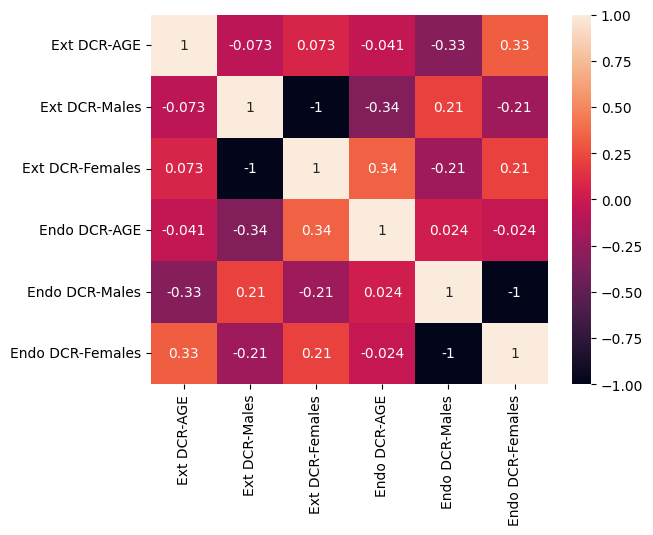

In [34]:
seaborn.heatmap(age_gender.corr(), annot=True)

In [35]:
age_analysis = age_gender.drop(['Ext DCR-Males', 'Ext DCR-Females', 'Endo DCR-Males', 'Endo DCR-Females'], axis=1)
age_analysis.columns


Index(['Ext DCR-AGE', 'Endo DCR-AGE'], dtype='object')

In [36]:
age_gender.columns

Index(['Ext DCR-AGE', 'Ext DCR-Males', 'Ext DCR-Females', 'Endo DCR-AGE',
       'Endo DCR-Males', 'Endo DCR-Females'],
      dtype='object')

In [37]:
age_analysis.describe()

,Ext DCR-AGE,Endo DCR-AGE
count,25.000000,25.000000
mean,54.960000,51.760000
std,13.264866,13.790939
min,36.000000,20.000000
25%,43.000000,44.000000
50%,56.000000,54.000000
75%,64.000000,60.000000
max,87.000000,71.000000


In [38]:
age_analysis.corr()

,Ext DCR-AGE,Endo DCR-AGE
Ext DCR-AGE,1.000000,-0.040825
Endo DCR-AGE,-0.040825,1.000000


<Axes: >

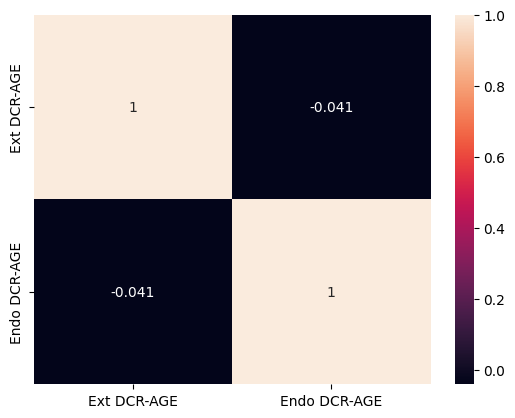

In [39]:
seaborn.heatmap(age_analysis.corr(), annot=True)

<Axes: >

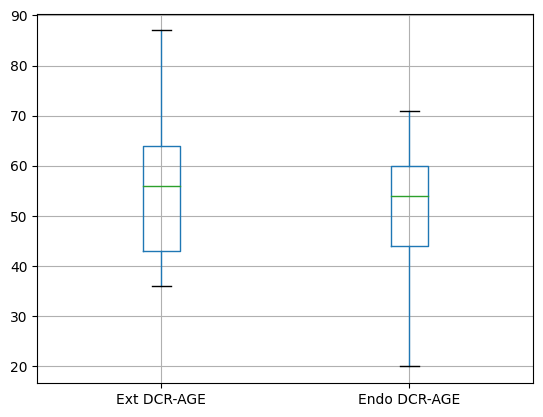

In [40]:
age_analysis.boxplot()

<Axes: >

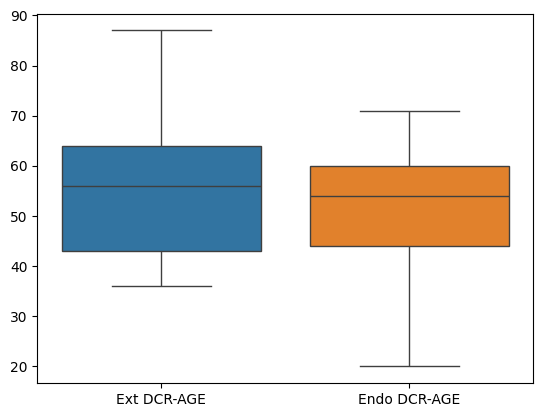

In [41]:
seaborn.boxplot(age_analysis)

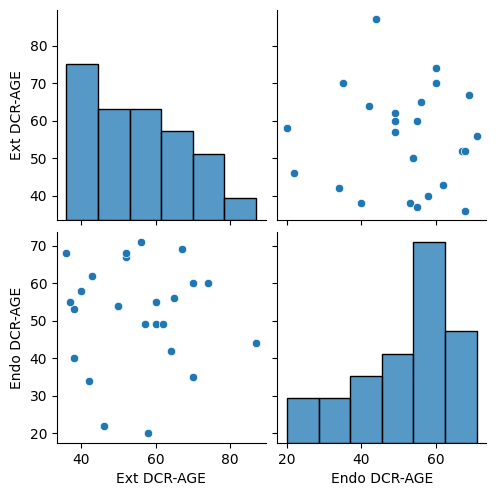

In [43]:
seaborn.pairplot(age_analysis)

<ipython-input-44-c4b8ec470214>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  seaborn.distplot(age_analysis)


<Axes: ylabel='Density'>

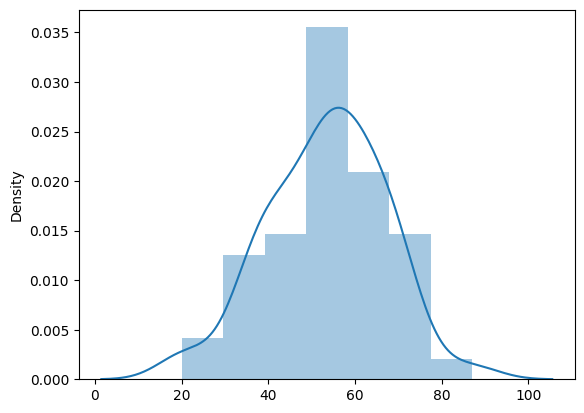

In [44]:
seaborn.distplot(age_analysis)

<Axes: ylabel='count'>

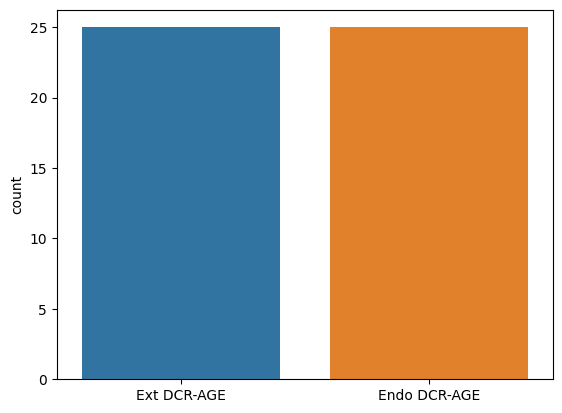

In [45]:
seaborn.countplot(age_analysis)

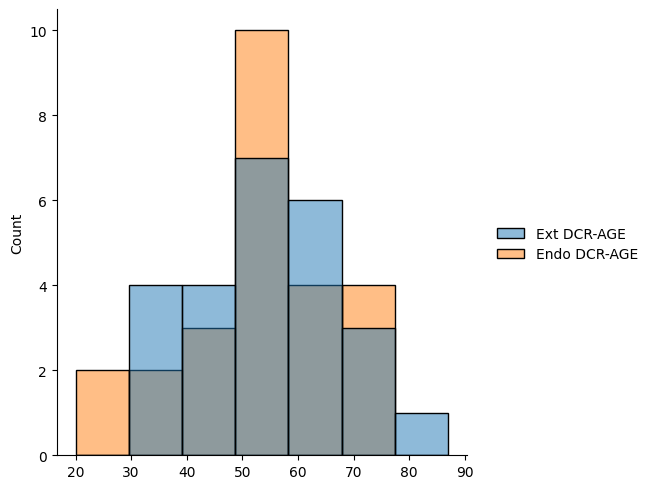

In [46]:
seaborn.displot(age_analysis)

<Axes: ylabel='Count'>

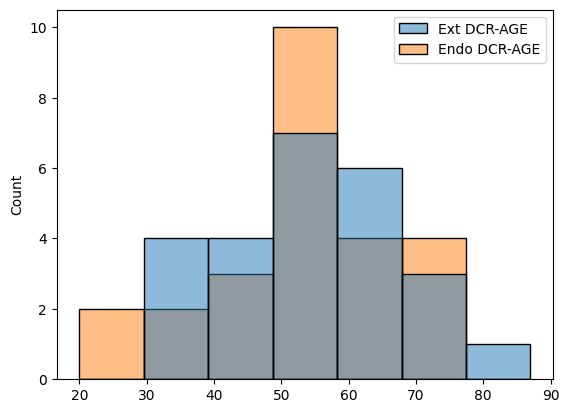

In [47]:
seaborn.histplot(age_analysis)

<Axes: >

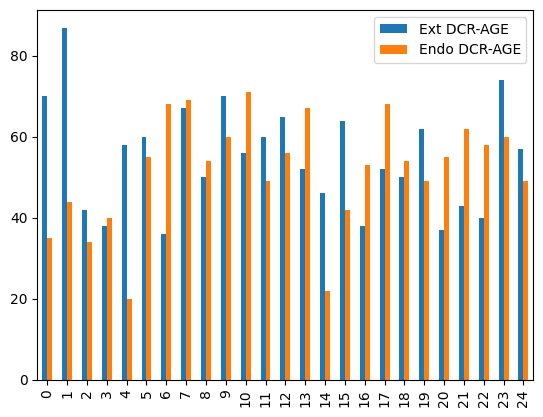

In [50]:
age_analysis.plot.bar()

array([[<Axes: title={'center': 'Ext DCR-AGE'}>,
        <Axes: title={'center': 'Endo DCR-AGE'}>]], dtype=object)

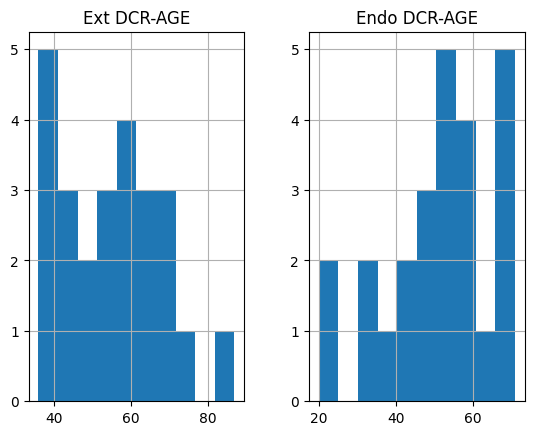

In [52]:
age_analysis.hist()

<Axes: >

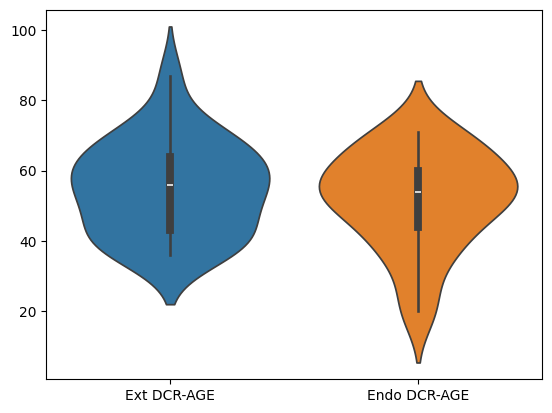

In [53]:
seaborn.violinplot(age_analysis)

<Axes: >

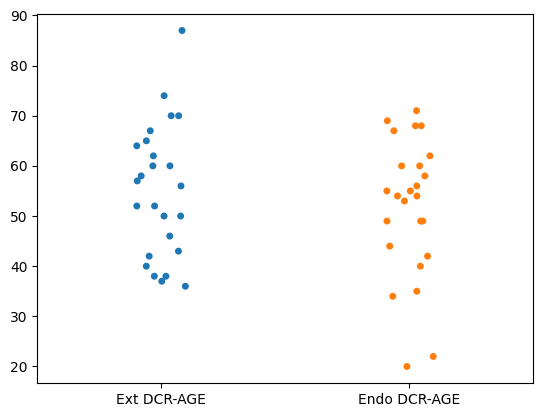

In [54]:
seaborn.stripplot(age_analysis)

<Axes: >

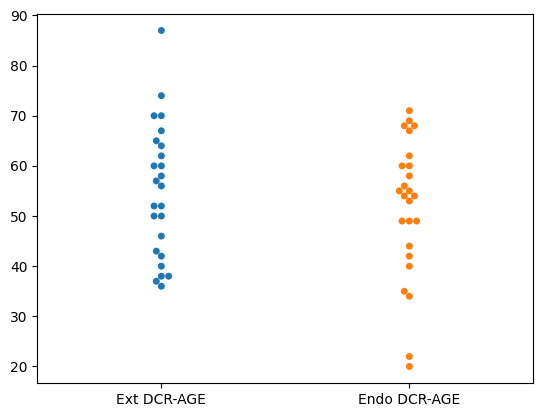

In [55]:
seaborn.swarmplot(age_analysis)

<Axes: ylabel='Density'>

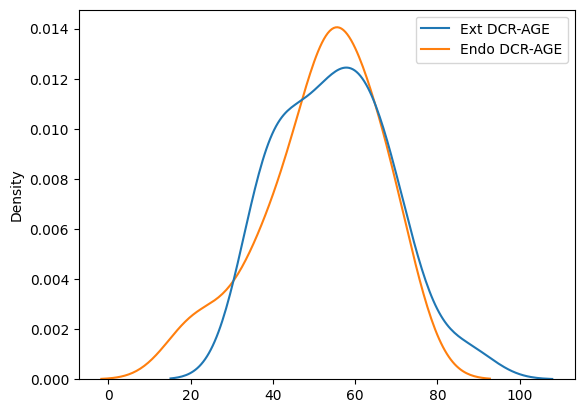

In [56]:
seaborn.kdeplot(age_analysis)

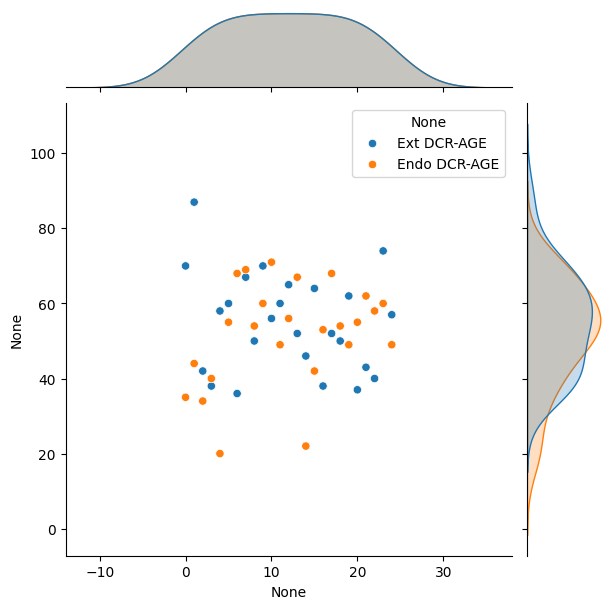

In [57]:
seaborn.jointplot(age_analysis)

<Axes: >

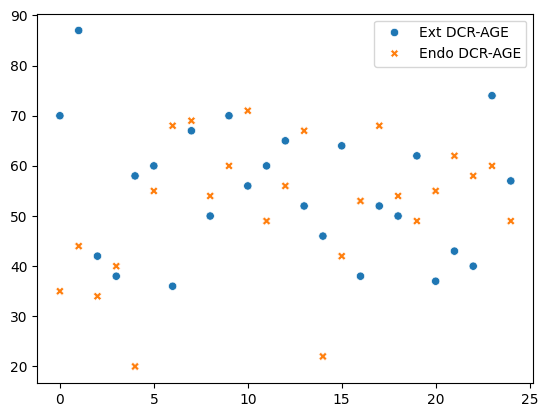

In [58]:
seaborn.scatterplot(age_analysis)

In [72]:
age_gender.columns
print(age_gender.columns)

Index(['Ext DCR-AGE', 'Ext DCR-Males', 'Ext DCR-Females', 'Endo DCR-AGE',
       'Endo DCR-Males', 'Endo DCR-Females'],
      dtype='object')


In [91]:
males = age_gender['Ext DCR-Males'].value_counts()
females = age_gender['Ext DCR-Females'].value_counts()
males


Ext DCR-Males
0    18
1     7
Name: count, dtype: int64

In [92]:
males = age_gender['Endo DCR-Males'].value_counts()
females = age_gender['Endo DCR-Females'].value_counts()
males


Endo DCR-Males
0    21
1     4
Name: count, dtype: int64

In [93]:
import scipy.stats as stats

# Define the contingency table
data = [[7, 4], [18, 22]]

# Perform the chi-square test
chi2, p, dof, expected = stats.chi2_contingency(data)

# Print the results
print(f"Chi2 statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies:")
print(expected)


Chi2 statistic: 0.5692473776223776
P-value: 0.4505581435309819
Degrees of freedom: 1
Expected frequencies:
[[ 5.39215686  5.60784314]
 [19.60784314 20.39215686]]


In [5]:
df1.sheetnames

['DCR dataset',
 'Age-Gender',
 'IO-L,W,OA',
 'Day 1 PostOp-L,W,OA,FDDT (2)',
 '1 month PostOp-L,W,OA,FDDT (2)',
 '3 month PostOp-L,W,OA,FDDT']

In [7]:
intraop_measurements = pd.read_excel('/content/drive/MyDrive/DCR new clean dataset.xlsx', sheet_name='IO-L,W,OA')
intraop_measurements.shape



(25, 6)

In [8]:
intraop_measurements.columns

Index(['Ext DCR(IO)-LENGTH', 'Ext DCR(IO)-WIDTH', 'Ext DCR(IO)-OA',
       'Endo DCR(IO)-LENGTH', 'Endo DCR(IO)-WIDTH', 'Endo DCR(IO)-OA'],
      dtype='object')

In [9]:
intraop_measurements.corr()

,Ext DCR(IO)-LENGTH,Ext DCR(IO)-WIDTH,Ext DCR(IO)-OA,Endo DCR(IO)-LENGTH,Endo DCR(IO)-WIDTH,Endo DCR(IO)-OA
Ext DCR(IO)-LENGTH,1.000000,0.014581,0.733900,0.068943,0.081958,0.112850
Ext DCR(IO)-WIDTH,0.014581,1.000000,0.679134,0.087318,-0.039101,-0.013336
Ext DCR(IO)-OA,0.733900,0.679134,1.000000,0.112985,0.038065,0.077436
Endo DCR(IO)-LENGTH,0.068943,0.087318,0.112985,1.000000,0.401562,0.700179
Endo DCR(IO)-WIDTH,0.081958,-0.039101,0.038065,0.401562,1.000000,0.933520
Endo DCR(IO)-OA,0.112850,-0.013336,0.077436,0.700179,0.933520,1.000000


<Axes: >

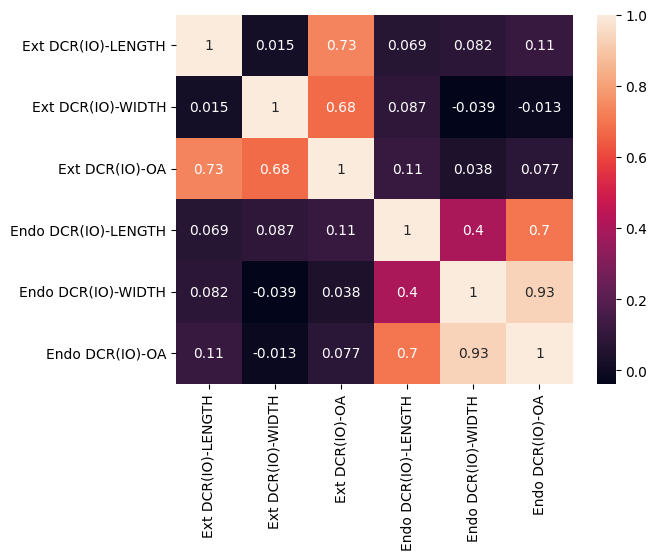

In [10]:
seaborn.heatmap(intraop_measurements.corr(), annot=True)